# Exploratory data analysis (EDA)

# Haberman Dataset

# Basic Description of Dataset

* The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings   Hospital on the survival of patients who had undergone surgery for breast cancer.

* link for dataset - https://www.kaggle.com/gilsousa/habermans-survival-data-set

* Number of Datapoints: 306

* Number of Features: 4 (including the class Feature)

* Feature Information:

  - Age of patient at time of operation (numerical)
  - Patient's year of operation (year - 1900, numerical)
  - Number of positive axillary nodes detected (numerical)
  - Survival status (class feature)
   - 1 = the patient survived 5 years or longer
   - 2 = the patient died within 5 year




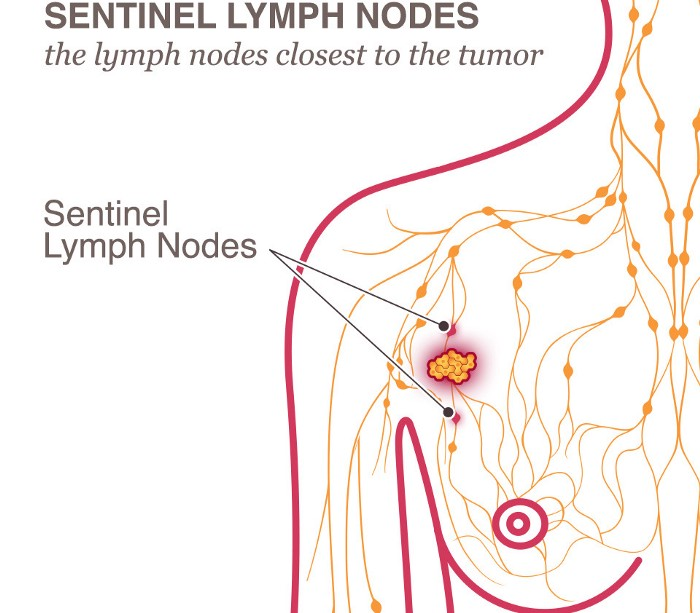

# Our objective here is to do data analysis of the dataset and find out which features are most useful to determine the resultant class, and how can we do that.

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Converting Haberman.csv to Pandas DataFrame.
haberman = pd.read_csv("haberman.csv")

# Seeing top 10 rows to get an idea about dataframe
haberman.head(10)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [56]:
# (Q) how many data-points and features?
print (haberman.shape)

(306, 4)


In [57]:
# (Q) What are the column names in our dataset?
print (haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [58]:
#(Q) How many data points for each class are present? 

haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

* Haberman Dataset is not a balanced dataset as number of datapoint are different for class status

In [59]:
# statistical details of the dataset
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [60]:
# number of null values from each columns
haberman.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

* There are no missing values which is great.

In [61]:
# replacing 1,2 with yes,no in status column for better understanding and plotting
haberman = haberman.replace( {'status': {1: 'Yes', 2: 'No'} } )
haberman.head(10)

,age,year,nodes,status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes
5,33,58,10,Yes
6,33,60,0,Yes
7,34,59,0,No
8,34,66,9,No
9,34,58,30,Yes


In [62]:
haberman[haberman["status"]=="Yes"].describe()

,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [63]:
haberman[haberman["status"]=="No"].describe()

,age,year,nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


### Observations
* Here we can see that the mean and standard devation of age and year in both pateints lived and not lived are very similar and not much  
  difference, but there is surely differenc in nodes
  we can conclude that the nodes mean count is comparatively larger in pateints who cannot live more than 5 years
  

# Plotting

## Pair-plot
* To identify which combination of features are able to seperate the data points well enough.

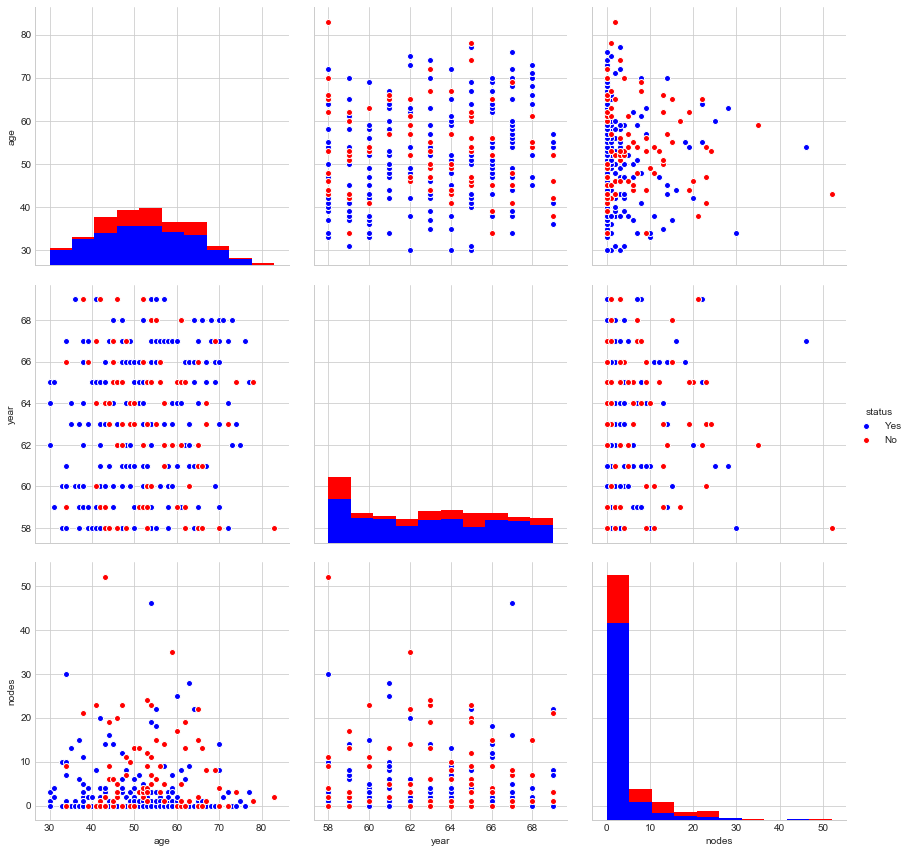

In [64]:
# Pair wise plots for all features
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", size=4, palette = ['b', 'r'])
plt.show()

**Observations**
1. As we can see all the plots, the datapoints are heavily overlapped and cannot be distinguised also the pdf's.

# Histogram, PDF, CDF

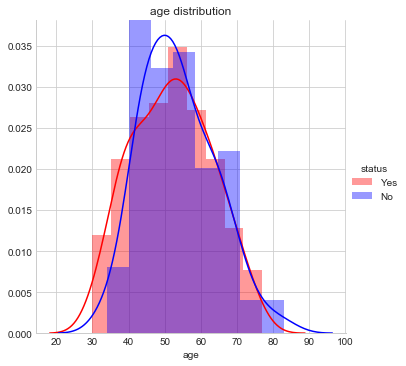

In [65]:
sns.FacetGrid(haberman, hue="status", size=5, palette = ['r','b']) \
   .map(sns.distplot, "age") \
   .add_legend()
plt.title('age distribution')
plt.show()



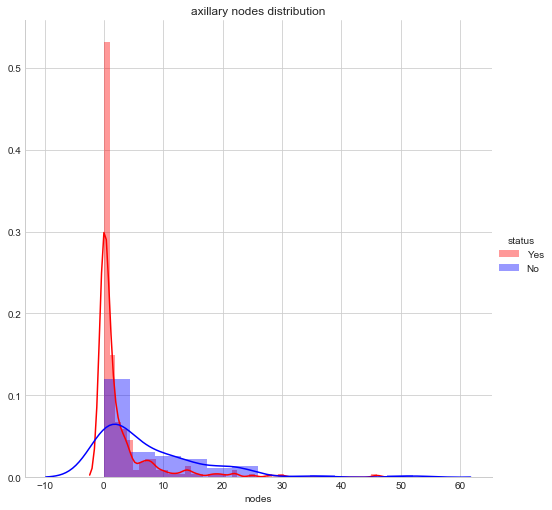

In [66]:
sns.FacetGrid(haberman, hue="status", size=7, palette = ['r','b']) \
   .map(sns.distplot, "nodes") \
   .add_legend()
plt.title('axillary nodes distribution')
plt.show()

* Here we can see that,
  - The chances of survival of patients having node count 0 is very high
  - The chances of survival of patients having node count more than 30 is very negligible.

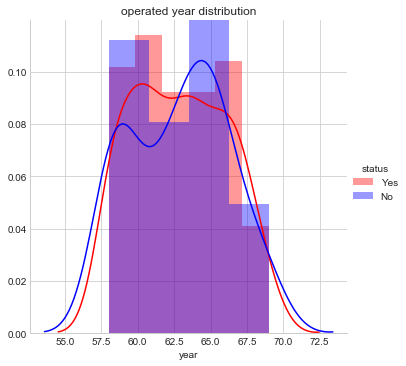

In [67]:
sns.FacetGrid(haberman, hue="status", size=5, palette = ['r','b']) \
   .map(sns.distplot, "year") \
   .add_legend()
plt.title('operated year distribution')
plt.show()

* From all the 3 distribution plots we can see that the most affective attribute is axillary nodes.
* so lets plot its PDF and CDF

In [68]:
lived = haberman.loc[haberman['status'] == 'Yes']
dead = haberman.loc[haberman['status'] == 'No']

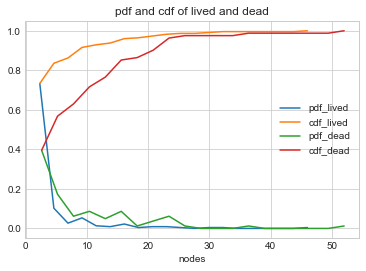

In [69]:
#lived
counts, bin_edges = np.histogram(lived['nodes'], bins=20, density = True)
l_pdf = counts/(sum(counts))
l_cdf = np.cumsum(l_pdf)
sns.set_style('whitegrid');
plt.plot(bin_edges[1:],l_pdf, label = 'pdf_lived');
plt.plot(bin_edges[1:], l_cdf, label = 'cdf_lived');

#dead
counts, bin_edges = np.histogram(dead['nodes'], bins=20, density = True)
d_pdf = counts/(sum(counts))
d_cdf = np.cumsum(d_pdf)
plt.plot(bin_edges[1:],d_pdf, label = 'pdf_dead');
plt.plot(bin_edges[1:], d_cdf, label = 'cdf_dead');

plt.title('pdf and cdf of lived and dead')
plt.xlabel('nodes')
plt.legend();

plt.show();


# Box plot and Whiskers

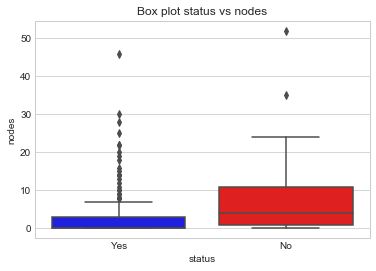

In [70]:
sns.boxplot(x='status', y='nodes', data=haberman, palette=['b', 'r'])
plt.title('Box plot status vs nodes');
plt.gca().legend('Yes', 'No');
plt.show()

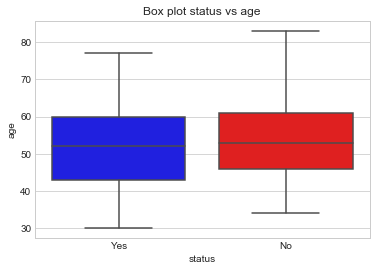

In [71]:
sns.boxplot(x='status', y='age', data=haberman, palette=['b', 'r'])
plt.title('Box plot status vs age');
plt.gca().legend('Yes', 'No');
plt.show()

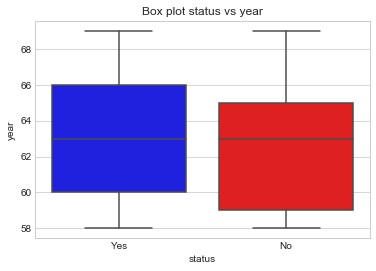

In [72]:
sns.boxplot(x='status', y='year', data=haberman, palette=['b', 'r'])
plt.title('Box plot status vs year');
plt.gca().legend('Yes', 'No');
plt.show()

# Violin plots

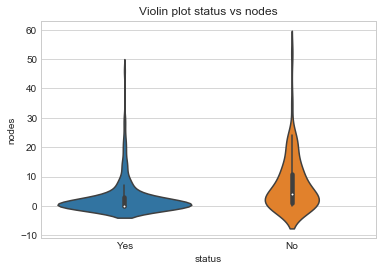

In [73]:
sns.violinplot(x="status", y="nodes", data=haberman, size=10)
plt.title('Violin plot status vs nodes')
plt.show()

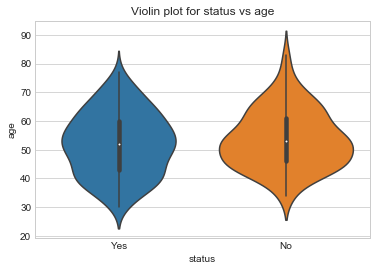

In [74]:
sns.violinplot(x="status", y="age", data=haberman, size=10)
plt.title('Violin plot for status vs age')
plt.show()

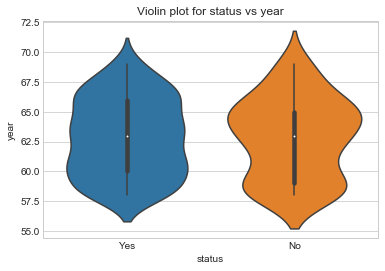

In [75]:
sns.violinplot(x="status", y="year", data=haberman, size=10)
plt.title('Violin plot for status vs year')
plt.show()

# Observations

* I have observed that the most affective feature is axillary node which determines patients chances of survial, not very accurately but out of 3 feautres, node is more dependent
* so nodes can be use for basic classification
* According to me, the chances of survival of patients having axillary nodes less or equal to 3 are very high, but increasing from 3 nodes heavly drops the chances of survival further.